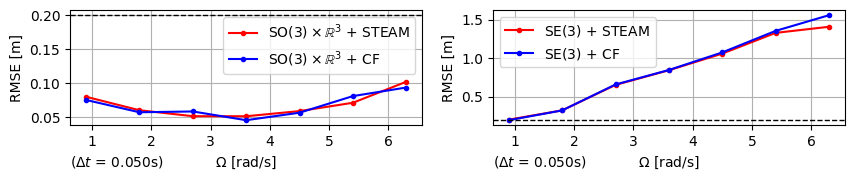

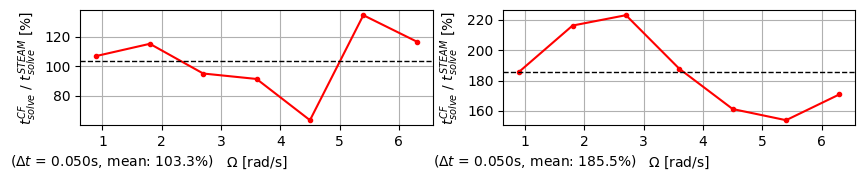

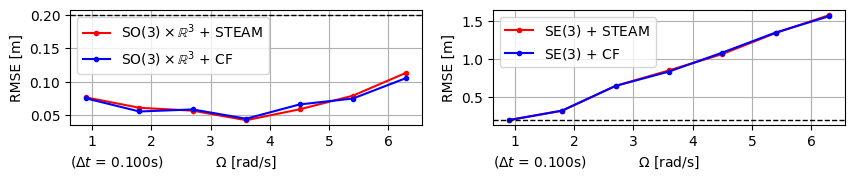

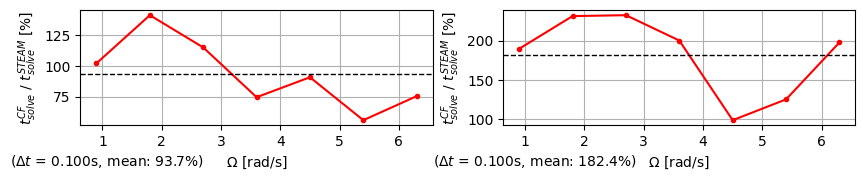

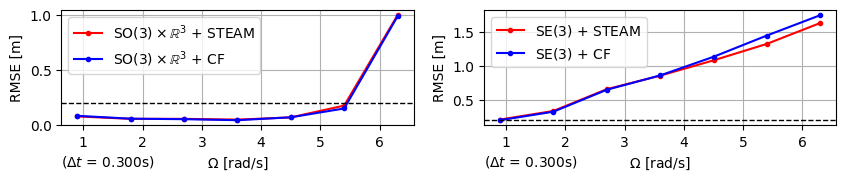

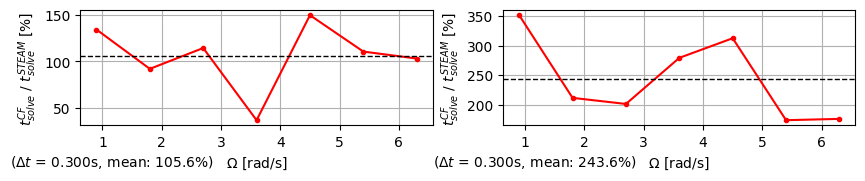

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

log_dir = '/media/tmn/mySataSSD1/Experiments/gptr_v2/logs/lidar_mle_noise/'
df = pd.read_csv(log_dir + '/gtrTrajso3xr3.csv')

df['m'] = df['dt']
df['n'] = df['wqx1']

ns = list(set(df['n'].tolist()))
ms = list(set(df['m'].tolist()))

def putText(ax, txt, xoffset, yoffset):
    ax.text(xoffset, yoffset, txt, transform=ax.transAxes,)
    
def plotAPCF(ax, dftemp, poseres, m):
    poseresmath = r'$\mathrm{SO}(3)\times\mathbb{R}^3$' if poseres.lower() == 'so3xr3' else '$\mathrm{SE}(3)$'
    ax.plot(dftemp["n"], dftemp[f"{poseres.lower()}ap_rmse"], marker="o", markersize=3, linestyle="-", color='r', label=f"{poseresmath} + STEAM")
    ax.plot(dftemp["n"], dftemp[f"{poseres.lower()}cf_rmse"], marker="o", markersize=3, linestyle="-", color='b', label=f"{poseresmath} + CF")
    
    ax.axhline(y=0.2, color="black", linestyle="--", linewidth=1)
    
    ax.grid('on')
    ax.set_xlabel('$\Omega$ [rad/s]')
    ax.set_ylabel('RMSE [m]')
    ax.legend(ncol=1)
    
def plotAPCFTslv(ax, dftemp, poseres, m):
    
    dftemp_ = dftemp.copy()
    dftemp_['tslv_ratio'] = dftemp_.apply(lambda x: x[f"{poseres.lower()}cf_tslv"]/ x[f"{poseres.lower()}ap_tslv"] * 100, axis=1)
    ax.plot(dftemp_["n"], dftemp_['tslv_ratio'], marker=".", linestyle="-", color='r')
    
    mean = dftemp_['tslv_ratio'].mean()
    ax.axhline(y=mean, color="black", linestyle="--", linewidth=1)

    ax.grid('on')
    ax.set_xlabel('$\Omega$ [rad/s]')
    ax.set_ylabel(r'$t_{solve}^{CF}$ / $t_{solve}^{STEAM}$ [%]')
    # ax.legend()
    
    return mean
    
    
for m in ms:

    # if m not in [2, 4]:
    #     continue   
       
    dftemp = df[ (df['m'] == m) & (df['n'] < 7) ]
    fig, ax = plt.subplots(1, 2, figsize=(10, 1.5))
    plotAPCF(ax[0], dftemp, 'SO3xR3', m)
    plotAPCF(ax[1], dftemp, 'SE3', m)
    
    # ylims = ax[0].get_ylim() + ax[1].get_ylim()
    # ymin, ymax = min(ylims), max(ylims)
    # ax[0].set_ylim([ymin, ymax])
    # ax[1].set_ylim([ymin, ymax])
    
    ax[0].text(0, -0.350,  f'($\Delta t$ = {m:.3f}s)', transform=ax[0].transAxes)
    ax[1].text(0, -0.350,  f'($\Delta t$ = {m:.3f}s)', transform=ax[1].transAxes)
    
    plt.show()
    
    # fig.tight_layout()
    fig.savefig(log_dir + f'pl_so3xr3_dt_{int(m*1000):03d}.jpg', bbox_inches='tight', dpi=300)
    
    
    
    # Plot the computational time
    fig, ax = plt.subplots(1, 2, figsize=(10, 1.5))
    mean0 = plotAPCFTslv(ax[0], dftemp, 'SO3xR3', m)
    mean1 = plotAPCFTslv(ax[1], dftemp, 'SE3', m)
    
    # ylims = ax[0].get_ylim() + ax[1].get_ylim()
    # ymin, ymax = min(ylims), max(ylims)
    # ax[0].set_ylim([ymin, ymax])
    # ax[1].set_ylim([ymin, ymax])
    
    ax[0].text(-0.2, -0.35, f'($\Delta t$ = {m:.3f}s, mean: {mean0:.1f}%)', transform=ax[0].transAxes)
    ax[1].text(-0.2, -0.35, f'($\Delta t$ = {m:.3f}s, mean: {mean1:.1f}%)', transform=ax[1].transAxes)
    
    # fig.tight_layout()
    fig.savefig(log_dir + f'pl_so3xr3_tslv_dt_{int(m*1000):03d}.jpg', bbox_inches='tight', dpi=300)

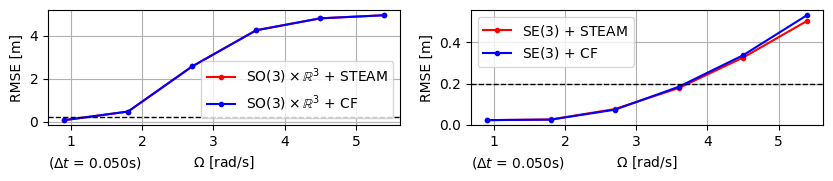

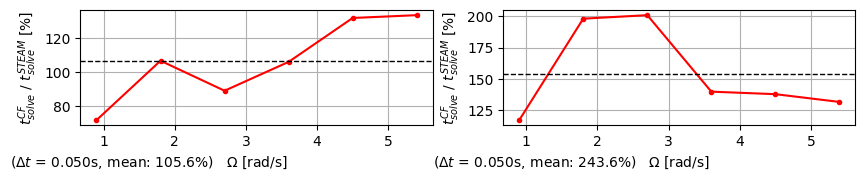

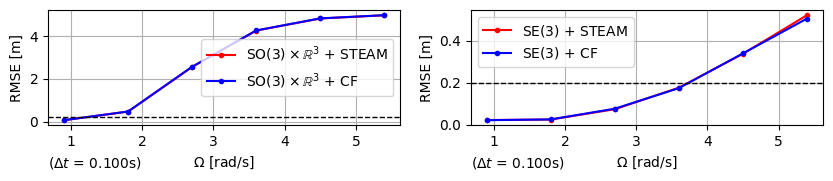

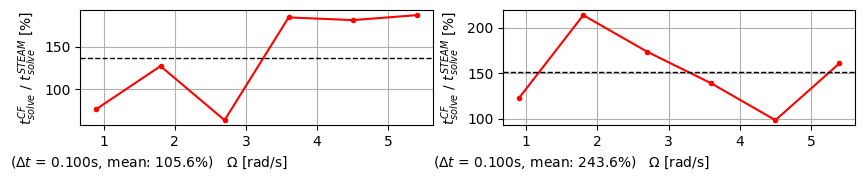

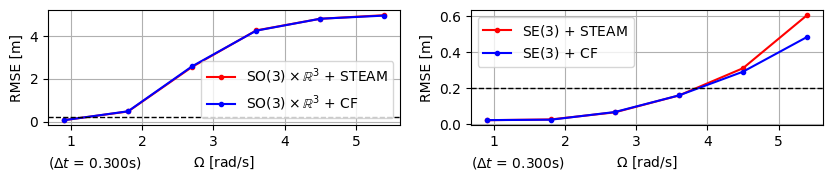

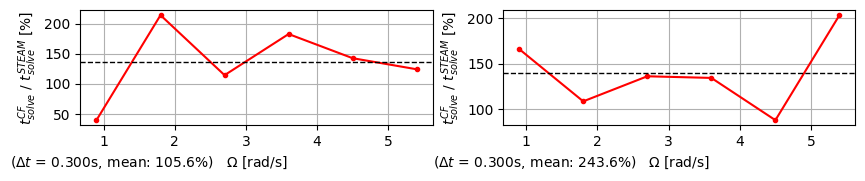

In [2]:
df = pd.read_csv(log_dir + '/gtrTrajse3.csv')

df['m'] = df['dt']
df['n'] = df['wqx1']

ns = list(set(df['n'].tolist()))
ms = list(set(df['m'].tolist()))

# def plotAPCF(ax, dftemp, poseres, n):
#     poseresmath = r'$\mathrm{SO}(3)\times\mathbb{R}^3$' if poseres.lower() == 'so3xr3' else '$\mathrm{SE}(3)$'
#     ax.plot(dftemp["n"], dftemp[f"{poseres.lower()}ap_rmse"], marker="o", markersize=3, linestyle="-", color='r', label=f"{poseresmath}, STEAM")
#     ax.plot(dftemp["n"], dftemp[f"{poseres.lower()}cf_rmse"], marker="o", markersize=3, linestyle="-", color='b', label=f"{poseresmath}, CF")
#     ax.grid('on')
#     ax.set_xlabel('$\Omega$ [rad/s]')
#     ax.set_ylabel('RMSE [m]')
#     ax.legend(loc="upper left", ncol=1)

for m in ms:

    # if m > 4:
    #     continue   
       
    dftemp = df[ (df['m'] == m) & (df['n'] < 6) ]
    fig, ax = plt.subplots(1, 2, figsize=(10, 1.5))
    plotAPCF(ax[0], dftemp, 'SO3xR3', m)
    plotAPCF(ax[1], dftemp, 'SE3', m)
    
    ylims = ax[1].get_ylim()
    ymin, ymax = min(ylims), max(ylims)
    
    # ax[0].set_ylim([ymin, 0.1])
    # ax[1].set_ylim([ymin, 0.1])
    
    ymean = ymin + (ymax - ymin)*0.90
    ax[0].text(0, -0.36,  f'($\Delta t$ = {m:.3f}s)', transform=ax[0].transAxes)
    ax[1].text(0, -0.36,  f'($\Delta t$ = {m:.3f}s)', transform=ax[1].transAxes)
    
    # ax[0].set_xticks(range(15))
    # ax[1].set_xticks(range(15))
    
    # ax_inset = inset_axes(ax[0], width="25%", height="25%", 
    #                       bbox_to_anchor=(-0.55, -0.35, 1.0, 1.0), bbox_transform=ax[0].transAxes)  # Size and position
    # ax_inset.yaxis.tick_right()
    # ax_inset.yaxis.set_label_position("right")
    # plotAPCF(ax_inset, dftemp, 'SO3xR3', m)
    # ax_inset.set_xlim([0.5, 1.5])
    # ax_inset.set_ylim([0, 0.2])
    # ax_inset.legend().remove()
    # ax_inset.set_xlabel("")
    # ax_inset.set_ylabel("")
    # # ax_inset.set_xticks(np.arange(0.3, 1.8))

    plt.show()

    # fig.tight_layout()
    fig.savefig(log_dir + f'pl_se3_dt_{int(m*1000):03d}.jpg', bbox_inches='tight', dpi=300)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 1.5))
    plotAPCFTslv(ax[0], dftemp, 'SO3xR3', m)
    plotAPCFTslv(ax[1], dftemp, 'SE3', m)
    
    ax[0].text(-0.2, -0.36, f'($\Delta t$ = {m:.3f}s, mean: {mean0:.1f}%)', transform=ax[0].transAxes)
    ax[1].text(-0.2, -0.36, f'($\Delta t$ = {m:.3f}s, mean: {mean1:.1f}%)', transform=ax[1].transAxes)
    
    # fig.tight_layout()
    fig.savefig(log_dir + f'pl_se3_tslv_dt_{int(m*1000):03d}.jpg', bbox_inches='tight', dpi=300)